In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)

In [22]:
import csv
f = open('review_data_all_brand.csv', 'r', encoding='cp949')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

['brand', 'date', 'rate', 'id', 'skin_type', 'select_1_title', 'select_1_content', 'select_2_title', 'select_2_content', 'select_3_title', 'select_3_content', 'txt']


In [37]:
# 데이터 불러오기
review = pd.read_csv('review_data_all_brand.csv', encoding='cp949')

In [39]:
# 컬럼 제거
review = review.drop(columns=['date', 'id', 'skin_type','select_1_title','select_2_title','select_3_title'])

In [41]:
# 컬럼 리네임
review.rename({'brand':'브랜드', 'rate': '평점', 'select_1_content':'피부타입',
               'select_2_content':'피부고민','select_3_content':'자극도', 'txt':'리뷰' }, axis=1, inplace=True)
review.columns

Index(['브랜드', '평점', '피부타입', '피부고민', '자극도', '리뷰'], dtype='object')

In [43]:
review.head()

,브랜드,평점,피부타입,피부고민,자극도,리뷰
0,닥터지,5점만점에 4점,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요\n크림은 튜브형태러 내줄 생각은 없는건지 궁금해요
1,닥터지,5점만점에 5점,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 ㅎㅎㅎ\n\n물론 건성피부에게 겨울에는 얼굴...
2,닥터지,5점만점에 5점,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯
3,닥터지,5점만점에 5점,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...
4,닥터지,5점만점에 4점,복합성에 좋아요,보습에 좋아요,자극없이 순해요,"- 여름용 수분크림이 필요해서 산 제품이에요.\n- 가격은 세일가로 28,800원 ..."


전처리 작업

In [46]:
# '\n' 제거
def remove_newline(text):
    return re.sub(r'\n', ' ', text)

review['리뷰'] = review['리뷰'].apply(remove_newline)

In [48]:
# 평점 중 점수 추출
def score_conversion(text):
    score_match = re.search(r'(\d+)점$', text) # 숫자 다음 '점'이 있는 패턴 찾기, ex) 5점만점에 4점
    if score_match:
        return score_match.group(1) # 추출된 숫자 반환(score_match에서 괄호로 묶인 첫 번째 그룹(숫자) 반환)
    else:
        return None

review['평점'] = review['평점'].apply(score_conversion)

In [50]:
# 구두점 제거 
from string import punctuation

def repreprocessing(text):
    return ''.join(word for word in text if word not in punctuation or word == '+')

review['리뷰'] = review['리뷰'].apply(repreprocessing)

In [52]:
# 하트 및 '+'를 제외한 구두점 제거
def cleanText(text):
    text = re.sub('[-=,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》❤️♥️♡]', '', text)
    return text

review['리뷰'] = review['리뷰'].apply(cleanText)

In [54]:
# 자음 반복 제거
def cleanText2(text):
 
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', text)
    return text


review['리뷰'] = review['리뷰'].apply(cleanText2)

In [135]:
# 중복값 제거
review['리뷰'].duplicated().sum()

589

In [137]:
review = review.drop_duplicates(subset='리뷰')

In [131]:
# 중복값 제거 4
review.count() # count로 기존 데이터수 확인 후, 5911
print(review['리뷰'].nunique()) # 5324
# 중복값 총 587개

5322


In [56]:
# 전처리 완료 후 모습
review.head()

,브랜드,평점,피부타입,피부고민,자극도,리뷰
0,닥터지,4,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요 크림은 튜브형태러 내줄 생각은 없는건지 궁금해요
1,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...
2,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯
3,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...
4,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 28800원 했어요사실...


In [58]:
# 데이터 개수 확인
review.shape

(5911, 6)

In [60]:
# null 확인
review.isnull().sum()

브랜드     0
평점      0
피부타입    0
피부고민    0
자극도     0
리뷰      0
dtype: int64

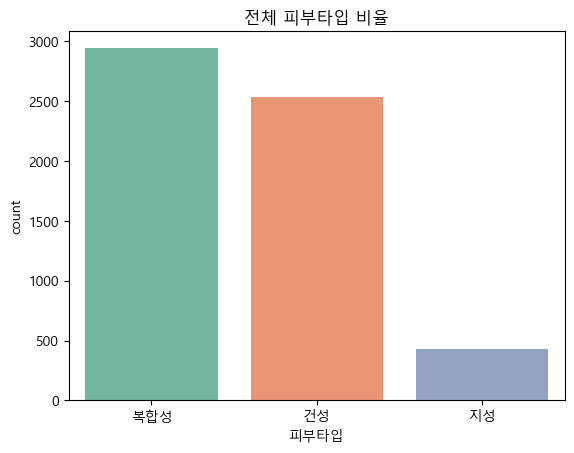

In [86]:
# 전체 피부 타입 비율 확인

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

review['피부타입'] = review['피부타입'].replace({
    '복합성에 좋아요': '복합성', 
    '건성에 좋아요': '건성', 
    '지성에 좋아요': '지성'
})

sns.countplot(x='피부타입', data=review, palette='Set2')
plt.title('전체 피부타입 비율')

plt.show()

In [66]:
brands = review['브랜드'].unique()
brands

array(['닥터지', '마녀공장', '아비브', '에스트라', 'AHC', 'CNP'], dtype=object)

In [82]:
# 각 브랜드별 피부타입 분포(수치 확인)
review.groupby(review['브랜드']).피부타입.count()

브랜드
AHC     1000
CNP      912
닥터지     1000
마녀공장     999
아비브     1000
에스트라    1000
Name: 피부타입, dtype: int64

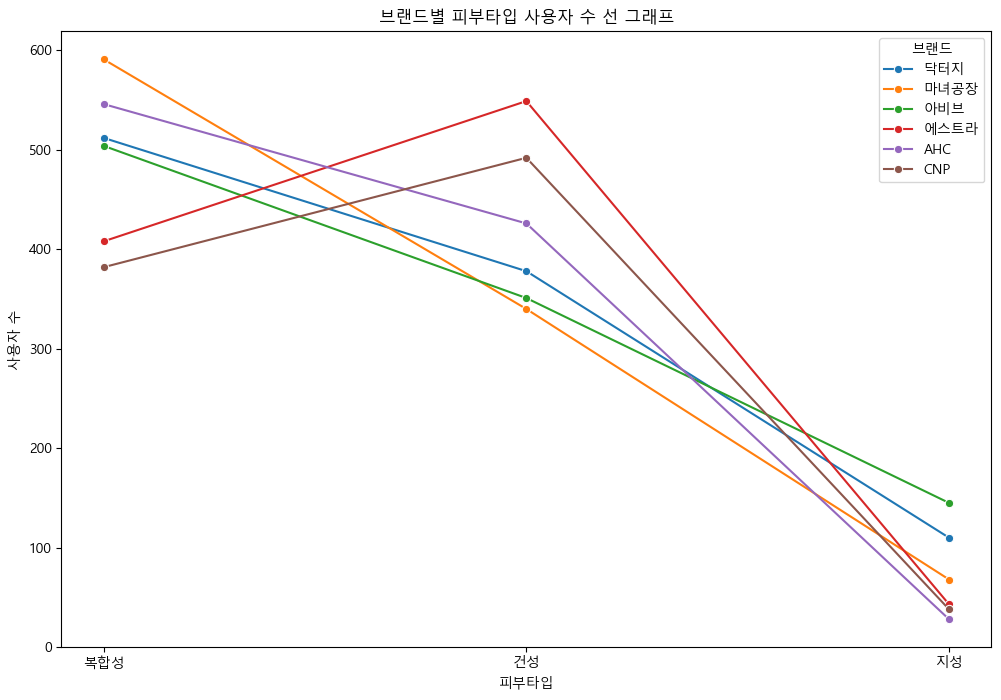

In [76]:
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부타입'].value_counts().reindex(['복합성', '건성', '지성'], fill_value=0).reset_index()
    count_data.columns = ['피부타입', '사용자']
    sns.lineplot(data=count_data, x='피부타입', y='사용자', label=brand, marker='o') 
    # 그래프가 번지는 느낌이 보기에 별로 안좋은 것 같아서 'ci=None'을 추가했습니다.
    
plt.legend(title='브랜드')
plt.title('브랜드별 피부타입 사용자 수 선 그래프')
plt.xlabel('피부타입')
plt.ylabel('사용자 수')
plt.show()

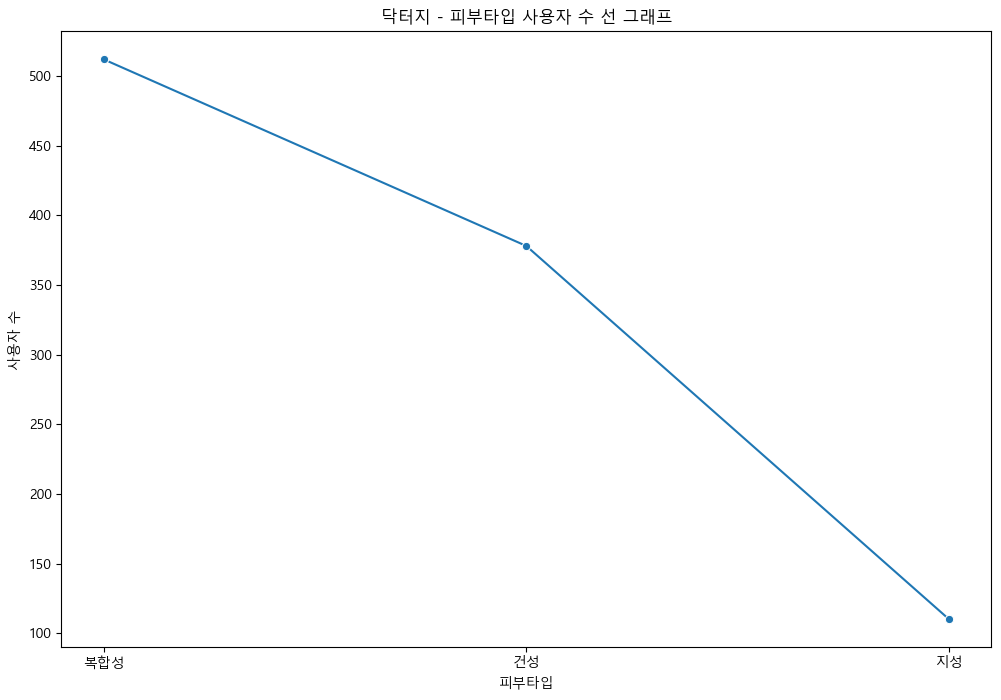

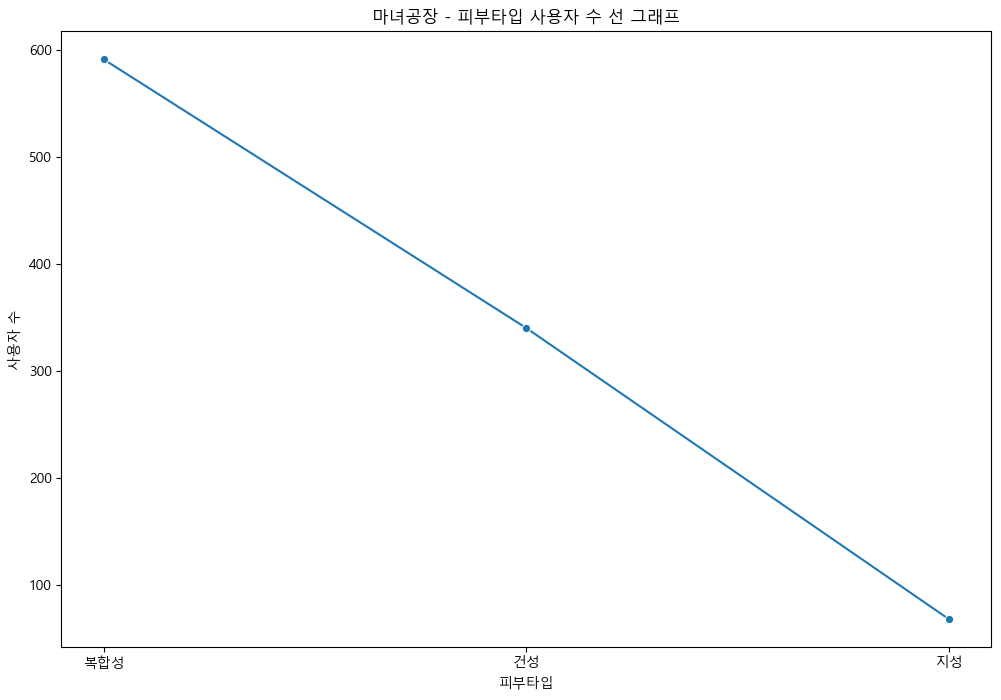

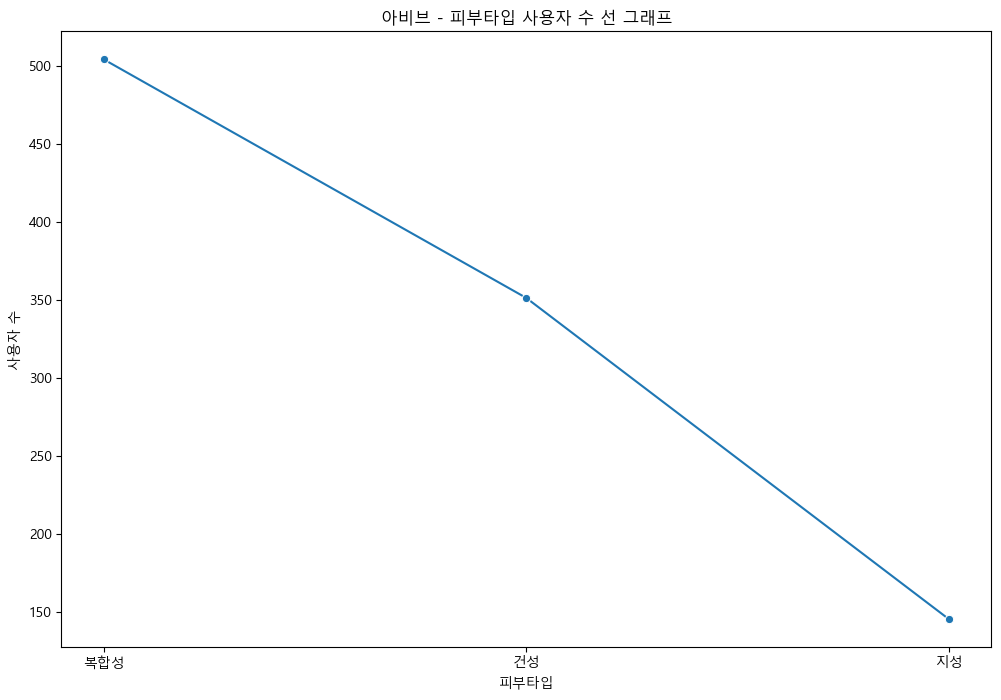

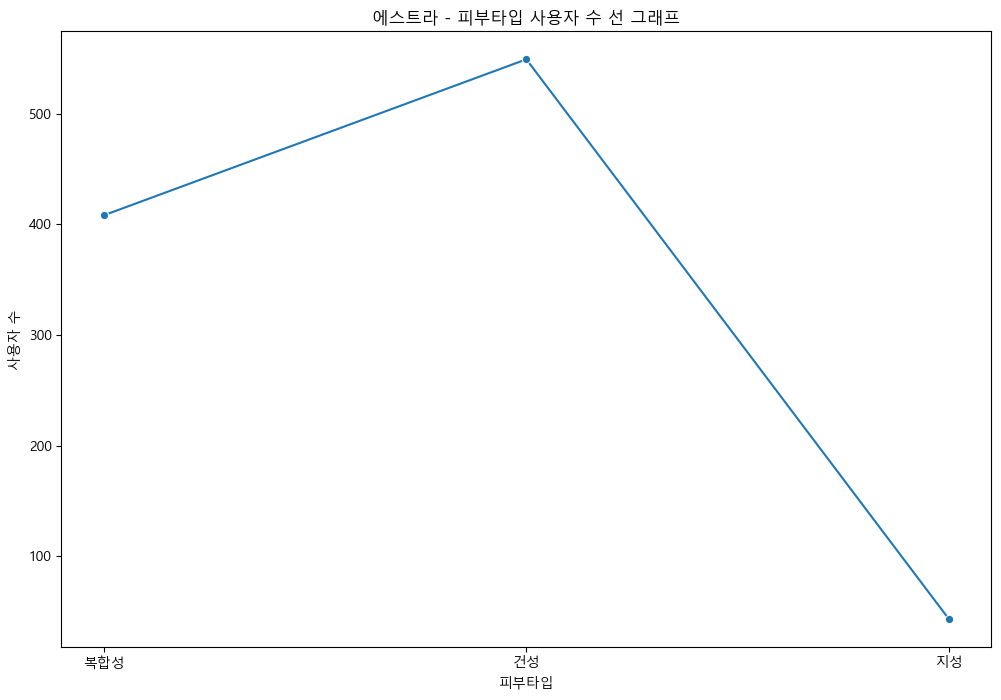

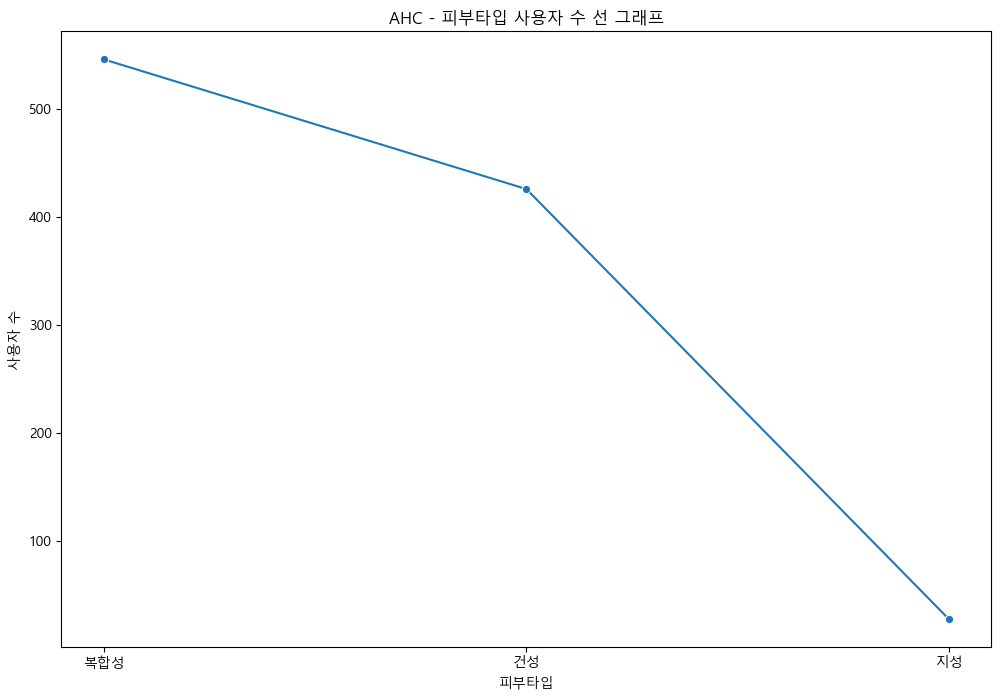

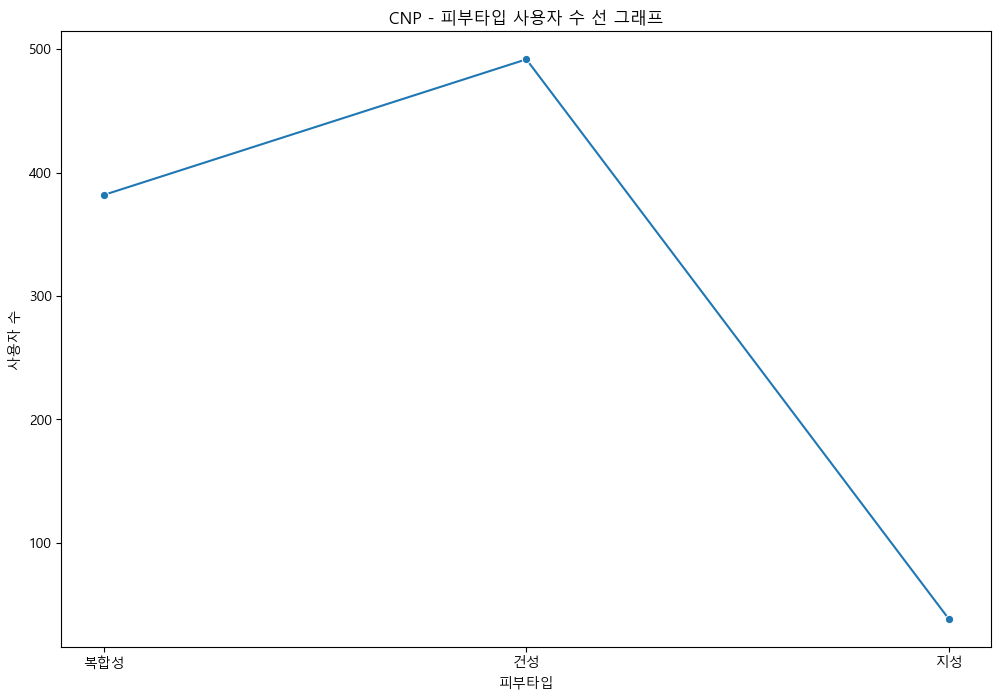

In [78]:
# 각 브랜드를 개별 그래프로 표현
for brand in brands:
    plt.figure(figsize=(12, 8))
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부타입'].value_counts().reindex(['복합성', '건성', '지성'], fill_value=0).reset_index()
    count_data.columns = ['피부타입', '사용자']
    sns.lineplot(data=count_data, x='피부타입', y='사용자', ci=None, marker='o')
    plt.title(f'{brand} - 피부타입 사용자 수 선 그래프')
    plt.xlabel('피부타입')
    plt.ylabel('사용자 수')
    plt.show()

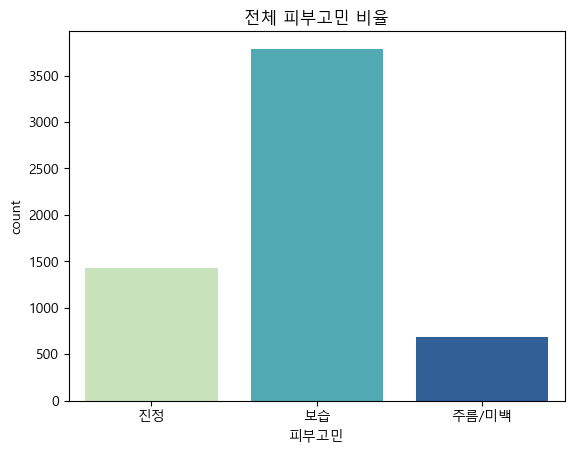

In [88]:
# 전체 피부고민 비율 확인하기
review['피부고민'] = review['피부고민'].replace({
    '진정에 좋아요': '진정', 
    '보습에 좋아요': '보습', 
    '주름/미백에 좋아요': '주름/미백'
})

sns.countplot(x='피부고민', data=review, palette='YlGnBu')
plt.title('전체 피부고민 비율')

plt.show()

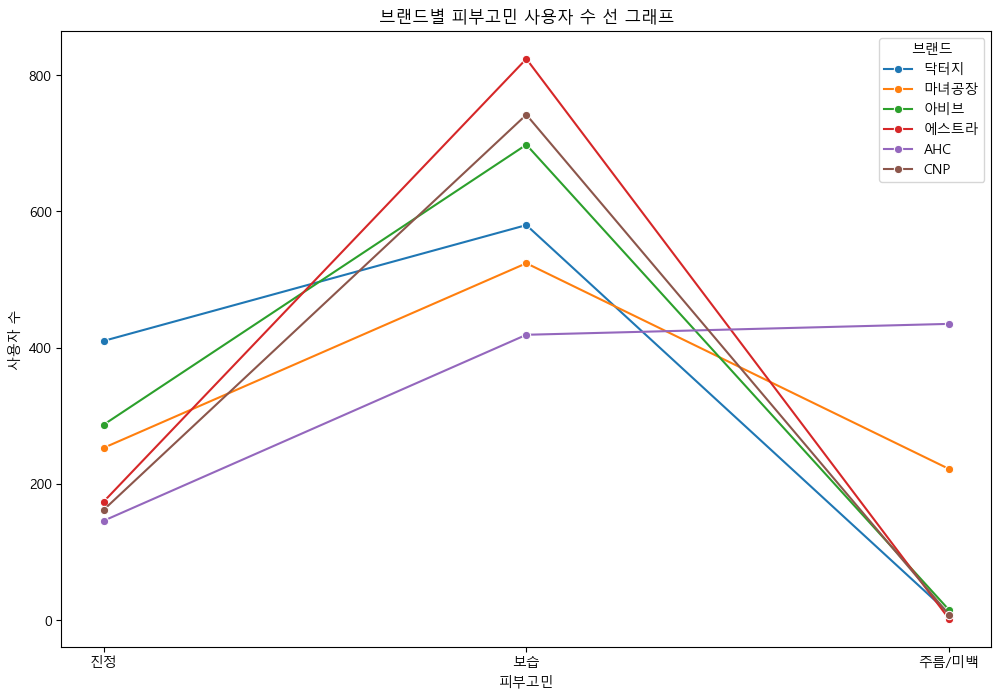

In [90]:
# 브랜드 별 피부고민 확인하기
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부고민'].value_counts().reindex(['진정', '보습', '주름/미백'], fill_value=0).reset_index()
    count_data.columns = ['피부고민', '사용자']
    sns.lineplot(data=count_data, x='피부고민', y='사용자', label=brand, ci=None, marker='o') 

plt.legend(title='브랜드')
plt.title('브랜드별 피부고민 사용자 수 선 그래프')
plt.xlabel('피부고민')
plt.ylabel('사용자 수')
plt.show()

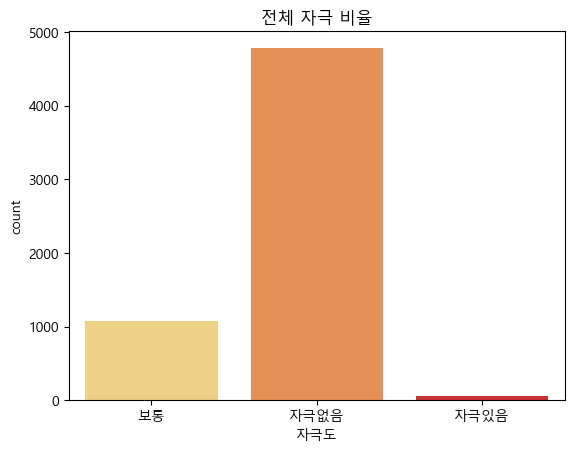

In [92]:
# 전체 자극도 비율 확인하기
review['자극도'] = review['자극도'].replace({
    '보통이에요': '보통', 
    '자극없이 순해요': '자극없음', 
    '자극이 느껴져요': '자극있음'
})

sns.countplot(x='자극도', data=review, palette='YlOrRd')
plt.title('전체 자극 비율')

plt.show()

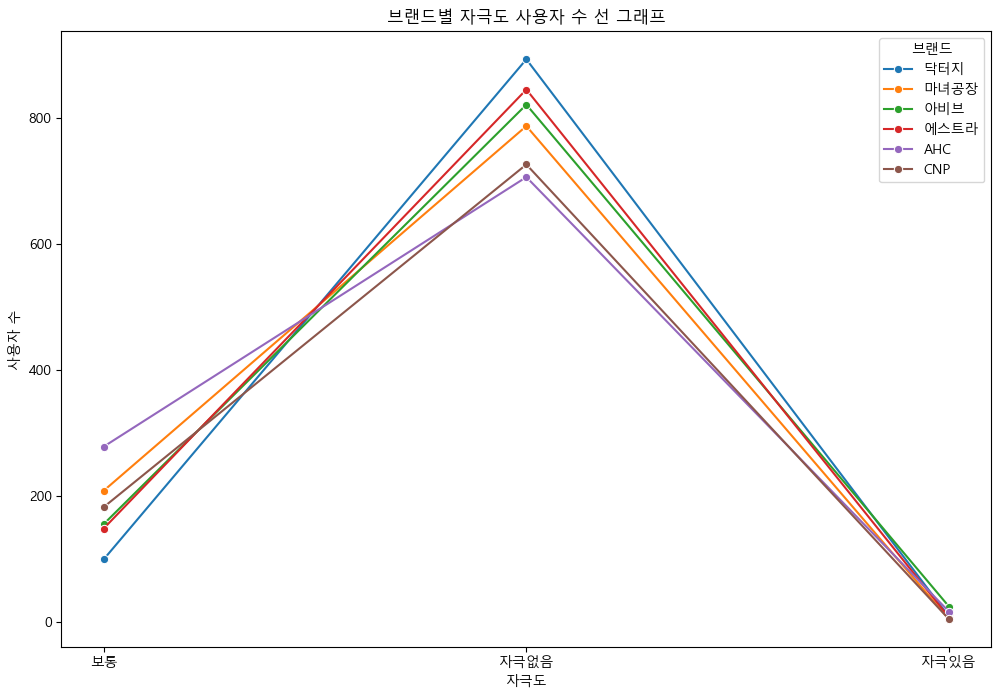

In [94]:
# 브랜드 별 자극도 확인하기
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['자극도'].value_counts().reindex(['보통', '자극없음', '자극있음'], fill_value=0).reset_index()
    count_data.columns = ['자극도', '사용자']
    sns.lineplot(data=count_data, x='자극도', y='사용자', label=brand, ci=None, marker='o') 

plt.legend(title='브랜드')
plt.title('브랜드별 자극도 사용자 수 선 그래프')
plt.xlabel('자극도')
plt.ylabel('사용자 수')
plt.show()

# txt 긍정/부정